# **Churn Analysis Lab**

Welcome to the Churn Analysis Lab!

**What is Churn Analysis?**
Churn Analysis is a process that involves understanding the patterns and reasons behind customers leaving a service or product.

**Why Perform Churn Analysis?**
It is a critical aspect of customer relationship management and helps businesses develop strategies to improve customer retention.

**How is Churn Analysis Performed?** Although the exact steps & process may vary depending on the use case, a general framework includes:

1.   Define Churn
2.   Data Collection
3.   Exploratory Data Analysis (EDA)
4.   Data Splitting
5.   Data Cleaning and Preprocessing
6.   Feature Engineering
7.   Model Training / Selection
8.   Model Evaluation
9.   Feature Importance
10.  Model Interpretation
11.  Model Deployment, Monitoring & Maintenance


Remember that this is an iterative process - the methodology can be adjusted and improved over time to reflect changes in the data!

**This Lab**

In this lab, we will be preforming churn analysis on an Ecommerce Dataset. The dataset includes information about each customer such as their age, gender & location, their activity & purchase patterns and their churn status, which we will be trying to predict. You can find the dataset [HERE](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction).

**Note: you will need to download the dataset and upload the file to this Collab notebook before running the code**

Good luck! 😀


# **Set Up**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Importing & Preview**

Let's read in our dataset and see what it looks like.

In [3]:
# Load the dataset
# Note: you will need to first upload the data to this notebook!
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name = 'E Comm')
df.head(5) # Preview the first 5 rows of the dataset

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
# Prints basic information about the dataset, such as the number of entries, column data types, and descriptive statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# **Exploratory Data Analysis (EDA)**

EDA is an important step to perform before modeling as it helps us understand the data, find patterns and identify correlations between variables. This often involves visualizing the data, as you will see below.

In [7]:
# Churn distribution in the dataset
churn_rate = (df['Churn'].sum() / len(df)) * 100
print("Churn Rate: {}%".format(churn_rate.round()))

Churn Rate: 17.0%


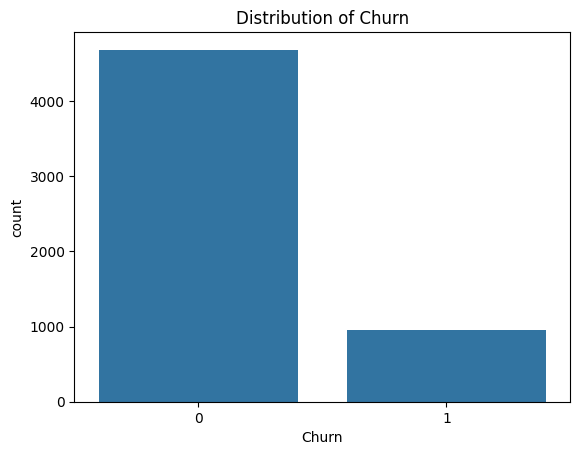

In [8]:
# Visualize the distribution of churn
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

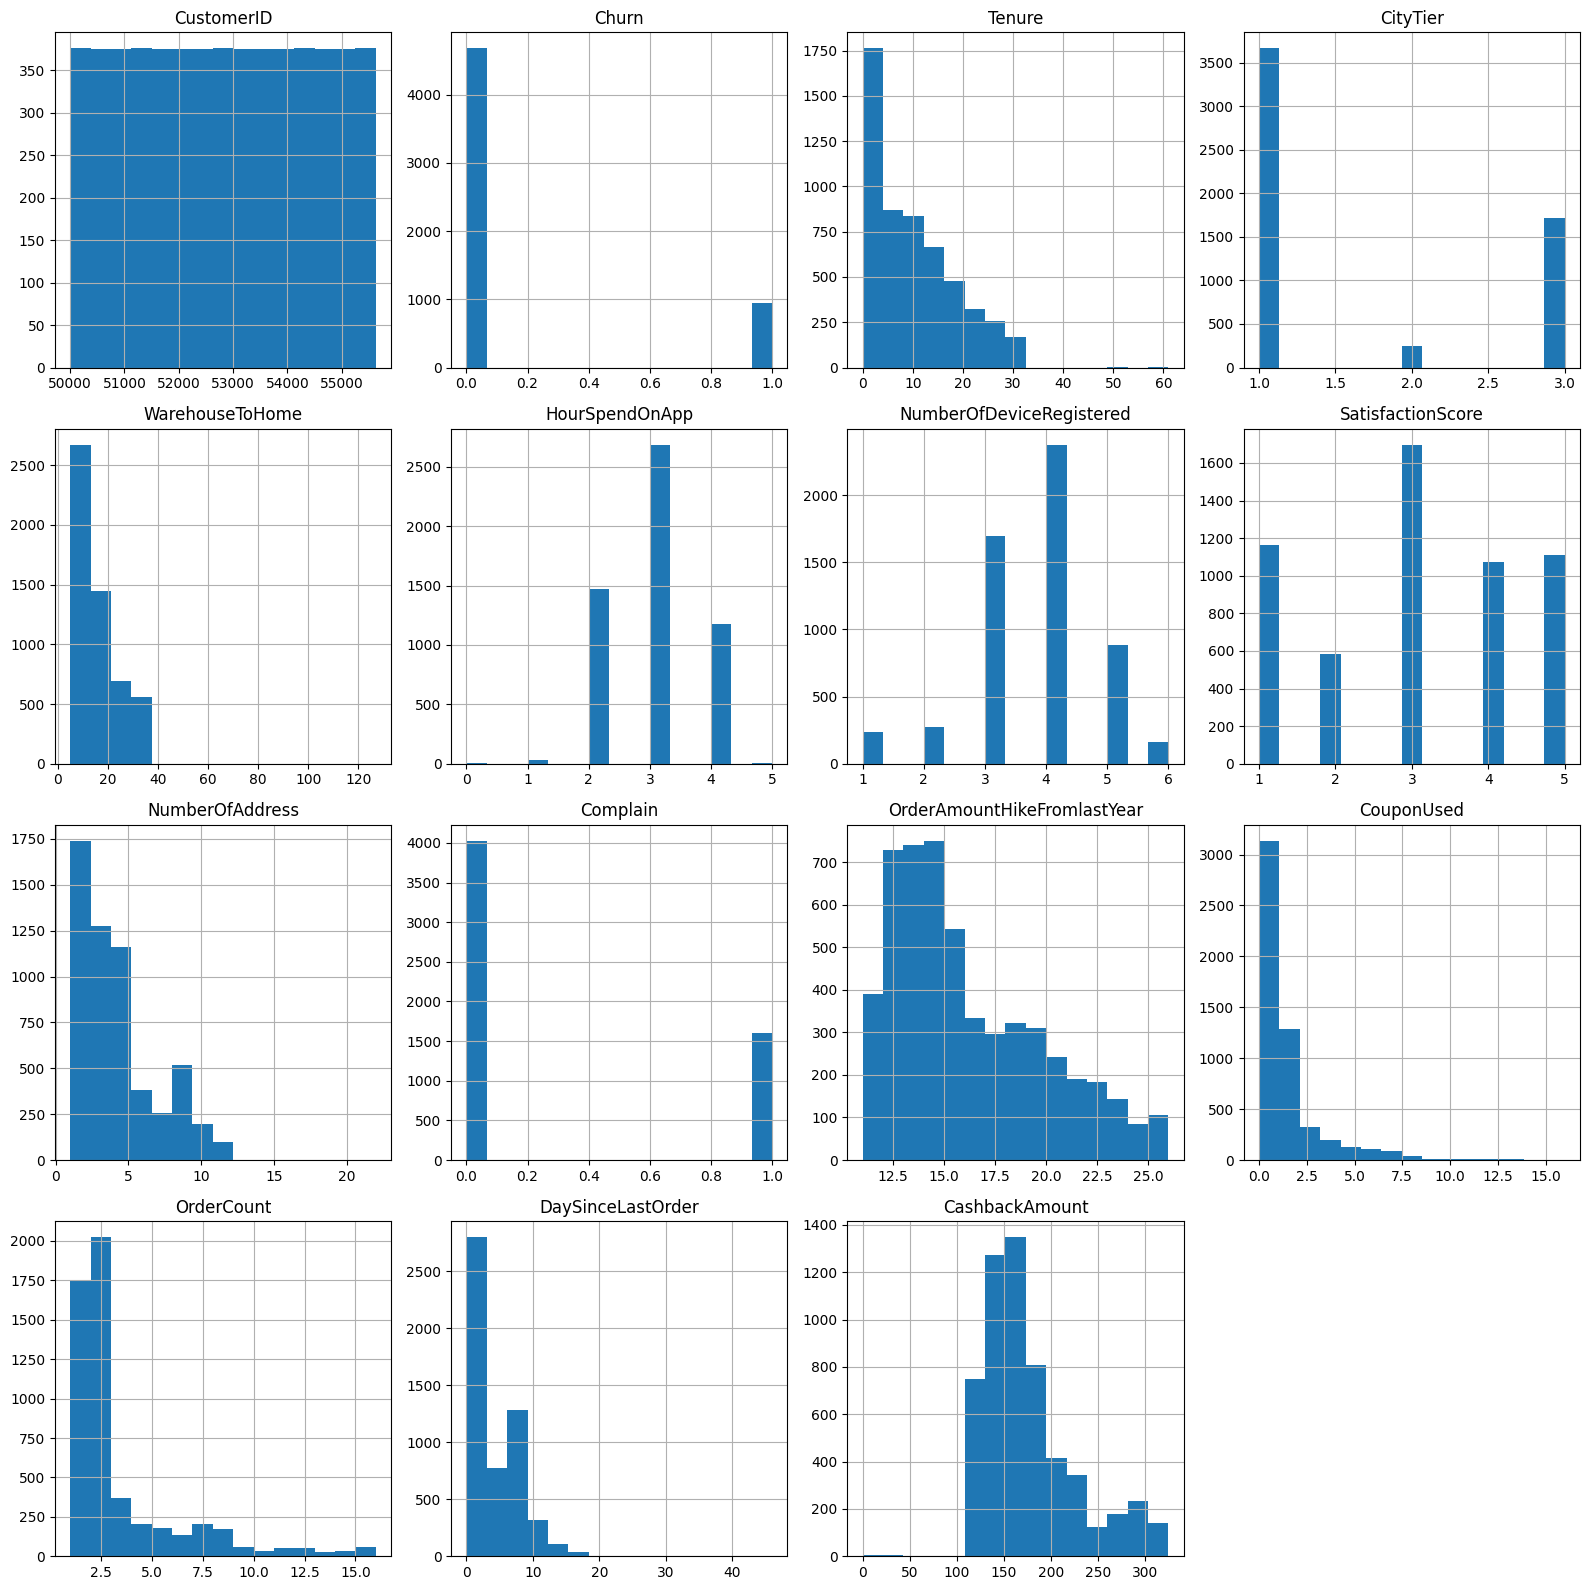

In [9]:
# Visualize the distribution of numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns
df[num_features].hist(bins=15, figsize=(16, 16), layout=(4, 4))
plt.tight_layout()
plt.show()

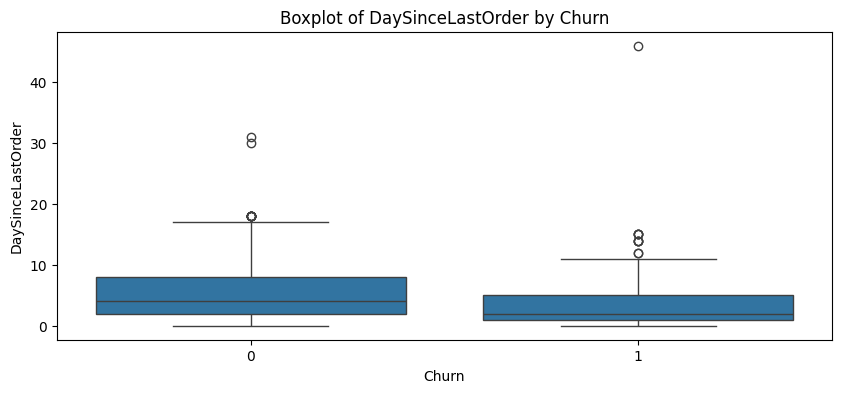

In [10]:
# Boxplot for numerical features to check for outliers and compare distributions between churned and retained customers.
# Using 'DaySinceLastOrder' as an example here but can use any of the numerical features
plt.figure(figsize=(10, 4))
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df)
plt.title('Boxplot of DaySinceLastOrder by Churn')
plt.show()

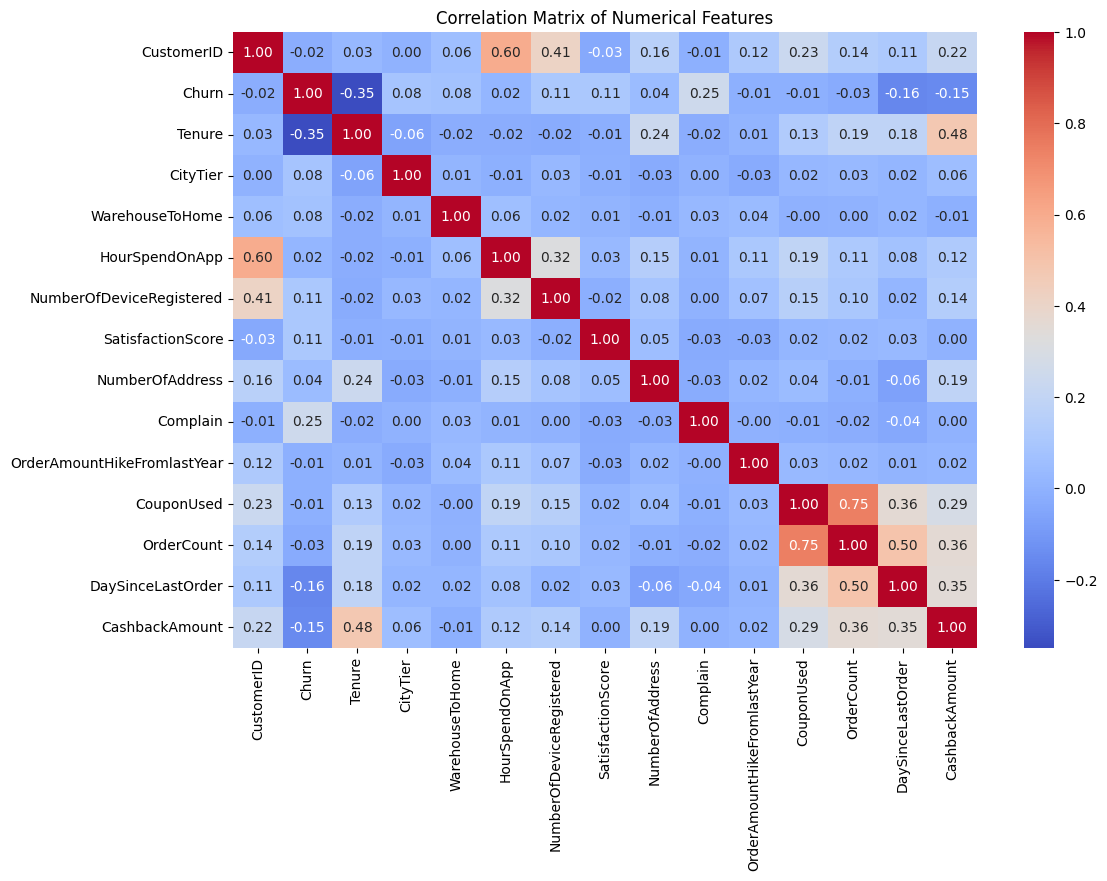

In [11]:
# Correlation matrix of numerical features
correlation_matrix = df[num_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

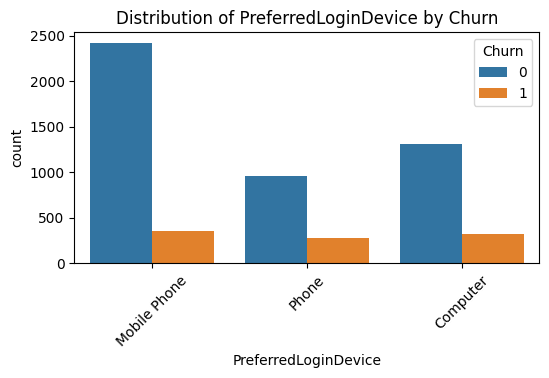

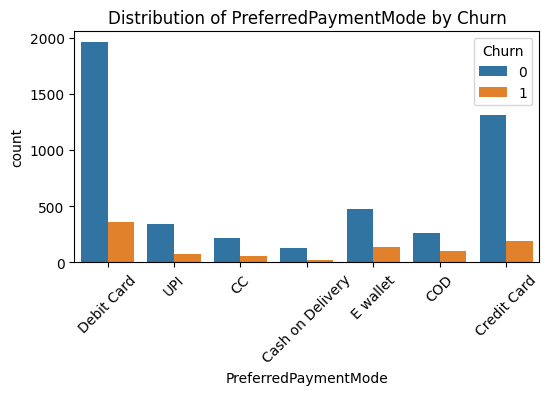

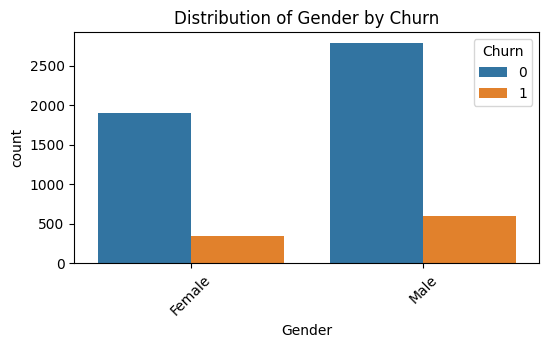

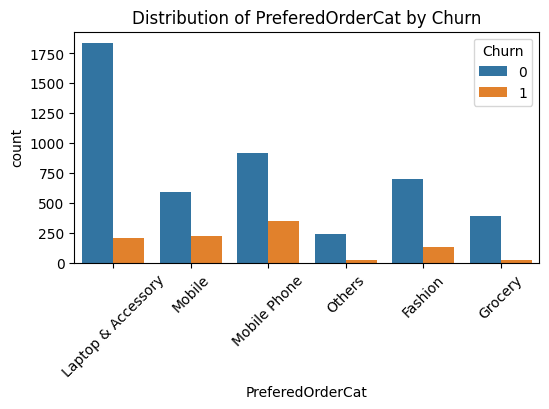

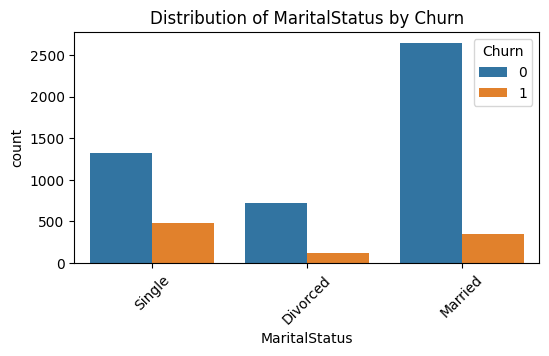

In [12]:
# Analyze categorical features
cat_features = df.select_dtypes(include=['object']).columns
for feature in cat_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Distribution of {feature} by Churn')
    plt.xticks(rotation=45)
    plt.show()

In [13]:
# Analyze the impact of categorical features on churn
for feature in cat_features:
    churn_rate_by_feature = df.groupby(feature)['Churn'].mean().sort_values(ascending=False)
    print(f"\nChurn Rate by {feature}:")
    print(churn_rate_by_feature)


Churn Rate by PreferredLoginDevice:
PreferredLoginDevice
Phone           0.224208
Computer        0.198286
Mobile Phone    0.125859
Name: Churn, dtype: float64

Churn Rate by PreferredPaymentMode:
PreferredPaymentMode
COD                 0.287671
E wallet            0.228013
CC                  0.216117
UPI                 0.173913
Cash on Delivery    0.154362
Debit Card          0.153846
Credit Card         0.128581
Name: Churn, dtype: float64

Churn Rate by Gender:
Gender
Male      0.177305
Female    0.154942
Name: Churn, dtype: float64

Churn Rate by PreferedOrderCat:
PreferedOrderCat
Mobile Phone          0.275374
Mobile                0.271941
Fashion               0.154964
Laptop & Accessory    0.102439
Others                0.075758
Grocery               0.048780
Name: Churn, dtype: float64

Churn Rate by MaritalStatus:
MaritalStatus
Single      0.267261
Divorced    0.146226
Married     0.115204
Name: Churn, dtype: float64


# **Train / Test Split**

Now that we have taken the time to explore and understand our data, we can move on to modeling.

The first step is to split out our data into a training and testing set so that we can use our training set for model development & selection and our testing set to assess performance on unseen data. This is important as this mimics how this model would be applied in the real world.

I also chose to remove the 'CustomerID' column as this is unique per each customer and therefore, will not have predictive value here.

In [18]:
# Define your features (X) and target variable (y)
X = df.drop(['Churn', 'CustomerID'], axis=1)
y = df['Churn']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Preprocessing**

Depending on the state of the data being used, different preprocessing steps will be required prior to feeding the data into the model. To give examples, we will be performing the following here:

1.   Identification / handling of missing values
2.   Scaling of numerical inputs
3.   Encoding of categorical variables

It is important to remember that we will be applying & fitting these steps on the training dataset only to avoid data leakage. However, we will need to apply the same transformations to the testing dataset prior to making predictions (more to come on this later in the lab).

In [21]:
# check for missing values
y_train.isnull().sum()

0

In [22]:
# check for missing values
X_train.isnull().sum() # --> will need to address these!

Tenure                         216
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                203
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 206
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    216
CouponUsed                     203
OrderCount                     207
DaySinceLastOrder              230
CashbackAmount                   0
dtype: int64

In [20]:
# define numerical & categorical variables as we will be treating these differently below
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

In [23]:
# Handle missing values; scale numerical inputs; encode categorical variables

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # For numerical features, fill in missing values with the median of the column
    ('scaler', StandardScaler())  # Normalization
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # For categorical features, fill in missing values with the most frequent value of the column

    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encoding categorical variables
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# Apply the preprocessing pipeline to the data
X_train_processed = preprocessor.fit_transform(X_train)

# The result is a NumPy array. Convert it back to a DataFrame
cat_features_after_encoding = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_features) # Get feature names after one-hot encoding
all_features = np.append(num_features, cat_features_after_encoding)

# Create a new DataFrame with all features
X_train_processed = pd.DataFrame(X_train_processed, columns=all_features)
X_train_processed.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-1.087206,-0.719,-0.428110,0.088855,0.303601,0.680172,-0.465169,1.575872,-0.750206,-0.396060,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.814685,-0.719,-0.309538,1.508010,1.281026,-0.044744,-0.465169,1.575872,-0.194690,0.143031,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.206074,-0.719,-0.783823,0.088855,0.303601,-0.044744,-0.853874,-0.634569,-1.027964,-0.935151,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.136260,-0.719,-0.902395,-1.330301,-0.673824,-0.769660,-0.853874,1.575872,2.027374,-0.396060,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.730601,-0.719,-0.546681,-1.330301,-0.673824,-0.769660,-1.242579,1.575872,-1.027964,-0.935151,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# **Model Training / Hyperparameter Optimization**

Now that we have preprocessed our training data, we are ready to test out some models! As an example, we are using RandomForestClassifier and performing GridSearchCV to optimize our hyperparameters.

Please note that you would usually want to test our various models and compare performance between them before selecting a final model but that is outside the scope of this lab/course.

In [24]:
# NOTE: THIS CODE WILL TAKE A FEW MINUTES TO RUN

# Initialize the base model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid to be optimized; just a couple of examples here
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV with the RandomForestClassifier and the hyperparameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_processed, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best parameters found: ", best_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [25]:
# Fit final model using parameters returned above

# Initialize the model
model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train the model on the training data
model.fit(X_train_processed, y_train)

# **Model Evaluation**

Let's see how our model does on our test set!

In [27]:
# Make predictions on the testing data
X_test_processed = preprocessor.transform(X_test)
X_test_processed = pd.DataFrame(X_test_processed, columns=all_features)
y_pred = model.predict(X_test_processed)

In [29]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", (accuracy_score(y_test, y_pred).round(2)))

Confusion Matrix:
[[939   2]
 [ 30 155]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       0.99      0.84      0.91       185

    accuracy                           0.97      1126
   macro avg       0.98      0.92      0.94      1126
weighted avg       0.97      0.97      0.97      1126

Accuracy Score: 0.97


# **Feature Importance**

In [31]:
# Feature importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train_processed.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                                       importance
Tenure                                   0.207987
CashbackAmount                           0.093225
WarehouseToHome                          0.067847
DaySinceLastOrder                        0.060567
NumberOfAddress                          0.059842
Complain                                 0.056691
OrderAmountHikeFromlastYear              0.056388
SatisfactionScore                        0.044341
NumberOfDeviceRegistered                 0.035605
OrderCount                               0.030541
CouponUsed                               0.028088
MaritalStatus_Single                     0.024325
CityTier                                 0.022444
HourSpendOnApp                           0.020358
PreferredPaymentMode_Debit Card          0.014881
PreferredLoginDevice_Computer            0.014776
PreferedOrderCat_Laptop & Accessory      0.014503
Gender_Male                              0.014219
MaritalStatus_Married       

# **Save Model**

In [ ]:
# Save the model for future use
import joblib
joblib.dump(model, 'churn_model.pkl')

In [ ]:
# To load the model later (for reference)
# loaded_model = joblib.load('churn_model.pkl')